In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy 

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | san cristobal
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | klaksvik
Processing Record 8 of Set 1 | udachnyy
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | ialibu
Processing Record 15 of Set 1 | dunedin
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | romny
Processing Record 22 of Set 1 | ilulissat
Processin

Processing Record 38 of Set 4 | saint-philippe
Processing Record 39 of Set 4 | kenora
Processing Record 40 of Set 4 | vila franca do campo
Processing Record 41 of Set 4 | houma
Processing Record 42 of Set 4 | batagay
Processing Record 43 of Set 4 | dandong
Processing Record 44 of Set 4 | asbe teferi
Processing Record 45 of Set 4 | byron bay
Processing Record 46 of Set 4 | witrivier
City not found. Skipping...
Processing Record 47 of Set 4 | pudozh
Processing Record 48 of Set 4 | almeria
Processing Record 49 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 50 of Set 4 | tambopata
Processing Record 1 of Set 5 | tocopilla
Processing Record 2 of Set 5 | sinnamary
Processing Record 3 of Set 5 | clarence town
Processing Record 4 of Set 5 | butaritari
Processing Record 5 of Set 5 | saint-augustin
Processing Record 6 of Set 5 | saldanha
Processing Record 7 of Set 5 | tambura
Processing Record 8 of Set 5 | derzhavinsk
Processing Record 9 of Set 5 | geraldton
Processing Recor

Processing Record 28 of Set 8 | sambava
Processing Record 29 of Set 8 | mayo
Processing Record 30 of Set 8 | lata
Processing Record 31 of Set 8 | hakodate
Processing Record 32 of Set 8 | labuhan
Processing Record 33 of Set 8 | almeirim
Processing Record 34 of Set 8 | leh
Processing Record 35 of Set 8 | aksarayskiy
Processing Record 36 of Set 8 | necochea
Processing Record 37 of Set 8 | ribeira grande
Processing Record 38 of Set 8 | imst
Processing Record 39 of Set 8 | moryakovskiy zaton
Processing Record 40 of Set 8 | taywarah
Processing Record 41 of Set 8 | satitoa
City not found. Skipping...
Processing Record 42 of Set 8 | tsienyane
City not found. Skipping...
Processing Record 43 of Set 8 | katobu
Processing Record 44 of Set 8 | bajo baudo
City not found. Skipping...
Processing Record 45 of Set 8 | portland
Processing Record 46 of Set 8 | half moon bay
Processing Record 47 of Set 8 | gilgil
City not found. Skipping...
Processing Record 48 of Set 8 | maniitsoq
Processing Record 49 of

Processing Record 15 of Set 12 | poso
Processing Record 16 of Set 12 | grand centre
City not found. Skipping...
Processing Record 17 of Set 12 | nome
Processing Record 18 of Set 12 | tuljapur
Processing Record 19 of Set 12 | nushki
Processing Record 20 of Set 12 | kaura namoda
Processing Record 21 of Set 12 | acapulco
Processing Record 22 of Set 12 | bolshiye uki
City not found. Skipping...
Processing Record 23 of Set 12 | kaduy
Processing Record 24 of Set 12 | moose factory
Processing Record 25 of Set 12 | walvis bay
Processing Record 26 of Set 12 | saint-jean-de-braye
Processing Record 27 of Set 12 | salinas
Processing Record 28 of Set 12 | tacuarembo
Processing Record 29 of Set 12 | tari
Processing Record 30 of Set 12 | asilah
Processing Record 31 of Set 12 | severnyy
Processing Record 32 of Set 12 | peniche
Processing Record 33 of Set 12 | kotelnich
Processing Record 34 of Set 12 | ust-kuyga
Processing Record 35 of Set 12 | yarmouth
Processing Record 36 of Set 12 | amboasary
Proces

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,20.37,88,36,6.55,RU,2021-10-21 18:00:05
1,San Cristobal,7.7669,-72.2250,86.77,40,20,5.68,VE,2021-10-21 18:00:06
2,Albany,42.6001,-73.9662,73.09,60,66,1.99,US,2021-10-21 17:59:45
3,Hermanus,-34.4187,19.2345,63.90,78,85,3.53,ZA,2021-10-21 18:00:07
4,Thompson,55.7435,-97.8558,33.76,70,50,5.23,CA,2021-10-21 18:00:07
5,East London,-33.0153,27.9116,71.67,75,90,14.58,ZA,2021-10-21 18:00:09
6,Klaksvik,62.2266,-6.5890,40.12,75,96,32.26,FO,2021-10-21 18:00:10
7,Udachnyy,66.4167,112.4000,19.71,95,47,8.57,RU,2021-10-21 18:00:11
8,Puerto Ayora,-0.7393,-90.3518,71.46,80,70,11.59,EC,2021-10-21 18:00:12
9,Hobart,-42.8794,147.3294,58.86,82,75,8.05,AU,2021-10-21 18:00:13


In [11]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2021-10-21 18:00:05,64.3833,-173.3000,20.37,88,36,6.55
1,San Cristobal,VE,2021-10-21 18:00:06,7.7669,-72.2250,86.77,40,20,5.68
2,Albany,US,2021-10-21 17:59:45,42.6001,-73.9662,73.09,60,66,1.99
3,Hermanus,ZA,2021-10-21 18:00:07,-34.4187,19.2345,63.90,78,85,3.53
4,Thompson,CA,2021-10-21 18:00:07,55.7435,-97.8558,33.76,70,50,5.23
...,...,...,...,...,...,...,...,...,...
566,Xiongzhou,CN,2021-10-21 18:04:09,25.1167,114.3000,55.04,91,100,3.51
567,Abu Kamal,SY,2021-10-21 18:04:09,34.4506,40.9171,72.54,30,0,3.85
568,Hay River,CA,2021-10-21 18:00:08,60.8156,-115.7999,41.04,61,0,10.74
569,Mantua,IT,2021-10-21 18:03:58,45.1667,10.7833,61.70,92,100,2.24


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

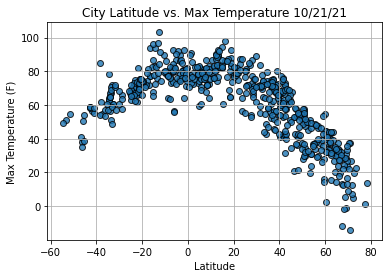

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

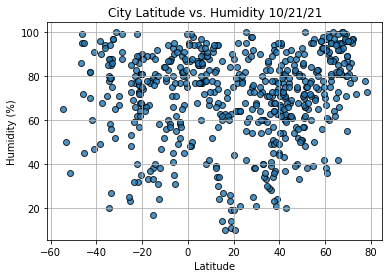

In [15]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

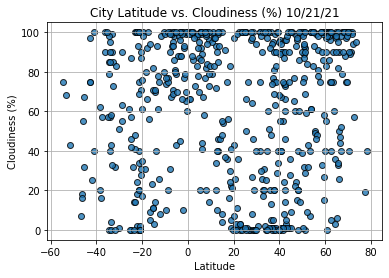

In [16]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()